In [1]:
!pip install segmentation-models

In [2]:
import segmentation_models as sm
from segmentation_models import Unet
import xarray as xr
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import tensorflow as tf

from segmentation_models import Linknet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [3]:
tf.config.run_functions_eagerly(True)

In [4]:
label_files = glob('/content/drive/MyDrive/Work/College/Classes/Capstone/sidewalk_dataset/cityscapes/labels/*.png')
image_files = glob('/content/drive/MyDrive/Work/College/Classes/Capstone/sidewalk_dataset/cityscapes/original/*.png')
label_files.sort()
image_files.sort()

In [6]:
n = 100
size_config = 480, 480
images = [cv2.resize(cv2.imread(file), size_config) for file in tqdm(image_files[:n])]
labels = [cv2.cvtColor(cv2.resize(cv2.imread(file), size_config), cv2.COLOR_BGR2GRAY) for file in tqdm(label_files[:n])]
labels = np.asarray(labels)

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

In [7]:
roads = (labels == 7) * labels
sidewalks = (labels == 8) * labels

In [8]:
y = []
for obj in tqdm(zip(roads, sidewalks), total=len(roads)):
  new = np.concatenate([obj[0][:, :, np.newaxis], obj[1][:, :, np.newaxis]], axis=2)
  y.append(new)
y = np.asarray(y)
y.shape

  0%|          | 0/23 [00:00<?, ?it/s]

(23, 480, 480, 2)

In [9]:
X = np.asarray(images).astype(np.uint8)

In [ ]:
# X = np.asarray(images).astype(np.uint8)
# y = np.asarray(labels).astype(np.uint8)
# print(X.shape, y.shape)

In [10]:
y = tf.cast(y, tf.float32)
y.shape

TensorShape([23, 480, 480, 2])

In [11]:
x_train = preprocess_input(X)
print(x_train.shape)

(23, 480, 480, 3)


In [12]:
model = Linknet('resnet34', input_shape=(None, None, 3), encoder_weights=None, classes=2)
model.compile('Adam', loss='mean_absolute_error')
# fit model
history = model.fit(
    x=x_train,
    y=y,
    batch_size=8,
    epochs=100,
    verbose=1,
    validation_split=0.25
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
3/3 [==============================] - 10s 2s/step - loss: 1.7117 - val_loss: 1.6532
Epoch 2/100
3/3 [==============================] - 2s 718ms/step - loss: 1.6606 - val_loss: 1.3225
Epoch 3/100
3/3 [==============================] - 2s 767ms/step - loss: 1.6209 - val_loss: 1.2873
Epoch 4/100
3/3 [==============================] - 2s 756ms/step - loss: 1.5880 - val_loss: 1.0862
Epoch 5/100
3/3 [==============================] - 2s 767ms/step - loss: 1.5571 - val_loss: 0.9269
Epoch 6/100
3/3 [==============================] - 2s 717ms/step - loss: 1.5271 - val_loss: 0.9250
Epoch 7/100
3/3 [==============================] - 2s 719ms/step - loss: 1.5000 - val_loss: 0.9239
Epoch 8/100
3/3 [==============================] - 2s 718ms/step - loss: 1.4755 - val_loss: 0.9238
Epoch 9/100
3/3 [==============================] - 2s 752ms/step - loss: 1.4550 - val_loss: 0.9238
Epoch 10/100
3/3 [==============================] - 2s 763ms/step - loss: 1.4345 - val_loss: 0.9238
Epoch 11/10

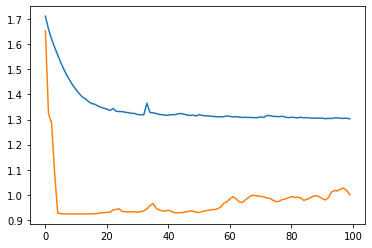

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [14]:
pred = model.predict(x_train)
pred.shape

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


(23, 480, 480, 2)

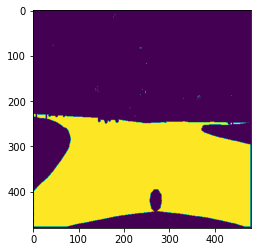

In [15]:
plt.imshow(y[0, :, :, 0])

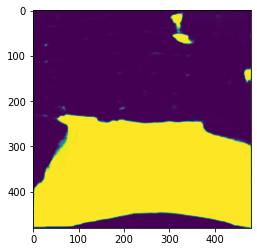

In [16]:
plt.imshow(pred[0, :, :, 0])